In [23]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import colors
from sklearn.preprocessing import StandardScaler, normalize, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
np.random.seed(10)

In [24]:
raw_df = pd.read_csv('../Data/supermarket/original.csv', usecols=[
                     'Ship Mode', 'Segment', 'City', 'State',
                     'Region', 'Category', 'Sub-Category', 'Sales'])
raw_df.fillna(method='ffill', inplace=True)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9800 non-null   object 
 1   Segment       9800 non-null   object 
 2   City          9800 non-null   object 
 3   State         9800 non-null   object 
 4   Region        9800 non-null   object 
 5   Category      9800 non-null   object 
 6   Sub-Category  9800 non-null   object 
 7   Sales         9800 non-null   float64
dtypes: float64(1), object(7)
memory usage: 612.6+ KB


In [25]:
encoder = OrdinalEncoder()
encoded_df = pd.DataFrame(raw_df)

encoded_df['Ship Mode'] = encoder.fit_transform(encoded_df[['Ship Mode']]) 
encoded_df['Segment'] = encoder.fit_transform(encoded_df[['Segment']]) 
encoded_df['City'] = encoder.fit_transform(encoded_df[['City']]) 
encoded_df['State'] = encoder.fit_transform(encoded_df[['State']]) 
encoded_df['Region'] = encoder.fit_transform(encoded_df[['Region']]) 
encoded_df['Category'] = encoder.fit_transform(encoded_df[['Category']]) 
encoded_df['Sub-Category'] = encoder.fit_transform(encoded_df[['Sub-Category']]) 
encoded_df['Sales'] = encoder.fit_transform(encoded_df[['Sales']]) 

encoded_df.head(5)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales
0,2.0,0.0,194.0,15.0,2.0,0.0,4.0,4156.0
1,2.0,0.0,194.0,15.0,2.0,0.0,5.0,5158.0
2,2.0,1.0,265.0,3.0,3.0,1.0,10.0,956.0
3,3.0,0.0,153.0,8.0,2.0,0.0,16.0,5329.0
4,3.0,0.0,153.0,8.0,2.0,1.0,14.0,1345.0


In [26]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(encoded_df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(5)

,P1,P2
0,-0.227987,0.053815
1,-0.238904,0.245420
2,-0.754312,-0.132837
3,-0.272750,0.701163
4,-0.246200,0.189895


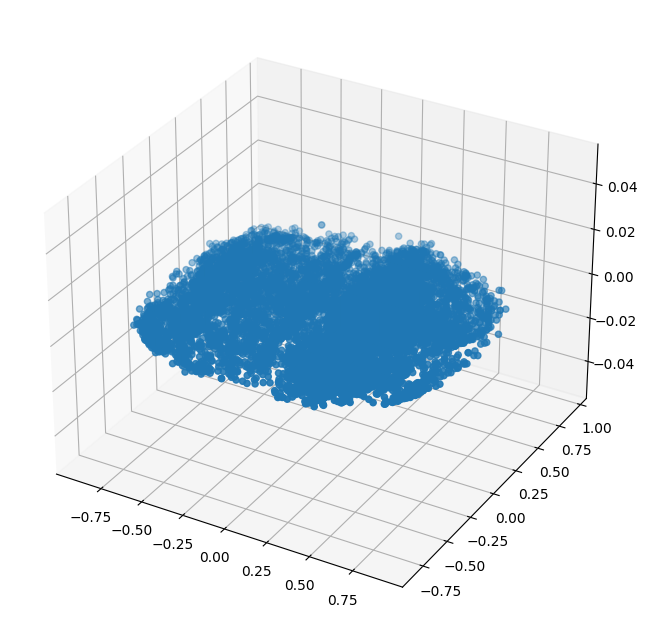

In [27]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_principal['P1'], X_principal['P2']) 
plt.show()

In [28]:
n_components_range = range(1, 11)
lowest_aic = np.inf
best_gmm = None

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X_principal)
    aic = gmm.aic(X_principal)
    
    if aic < lowest_aic:
        lowest_aic = aic
        best_gmm = gmm

print("Best GMM:", best_gmm)

Best GMM: GaussianMixture(n_components=10)


In [29]:
gmm_predictions = GaussianMixture(n_components=3).fit_predict(X_principal)
X_principal['Cluster'] = gmm_predictions
raw_df['Cluster'] = gmm_predictions

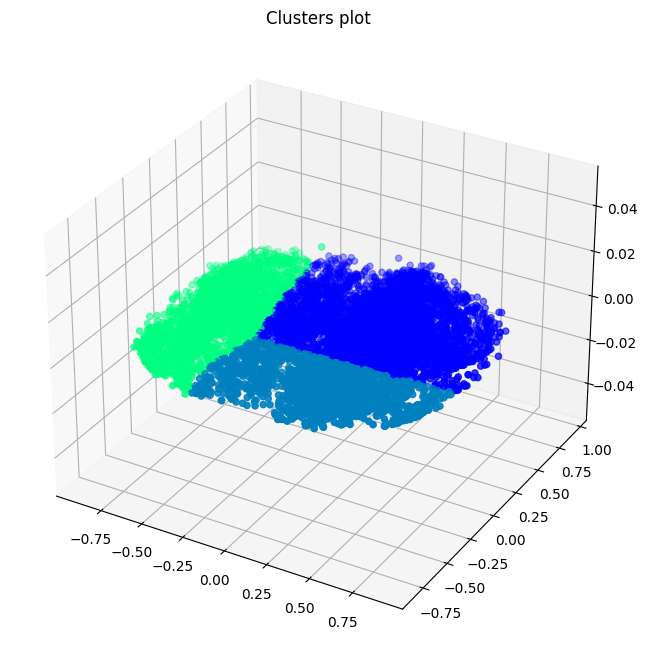

In [30]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_principal['P1'], X_principal['P2'],
           c=gmm_predictions,
           cmap=plt.cm.winter)
plt.title('Clusters plot')
plt.show()


Evaluating models

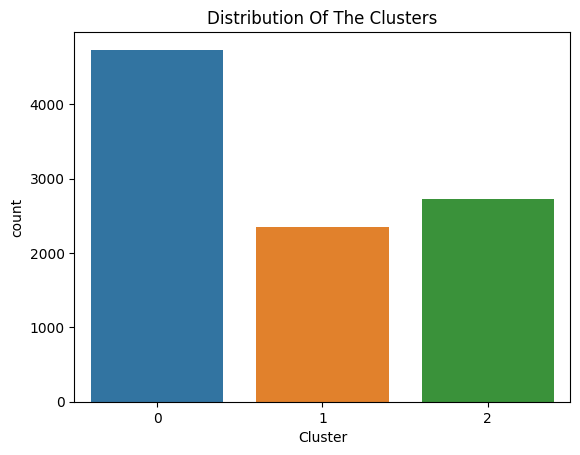

In [31]:
pl = sns.countplot(x=raw_df["Cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [32]:
len_cluster1 = np.count_nonzero(gmm_predictions == 1)
len_cluster2 = np.count_nonzero(gmm_predictions == 2)
len_cluster0 = len(gmm_predictions) - len_cluster1 - len_cluster2
len_df = len(raw_df)

print("Distribution cluster 0:", (len_cluster0 / len_df)*100)
print("Distribution cluster 1:", (len_cluster1 / len_df)*100)
print("Distribution cluster 2:", (len_cluster2 / len_df)*100)


Distribution cluster 0: 48.285714285714285
Distribution cluster 1: 23.959183673469386
Distribution cluster 2: 27.755102040816325


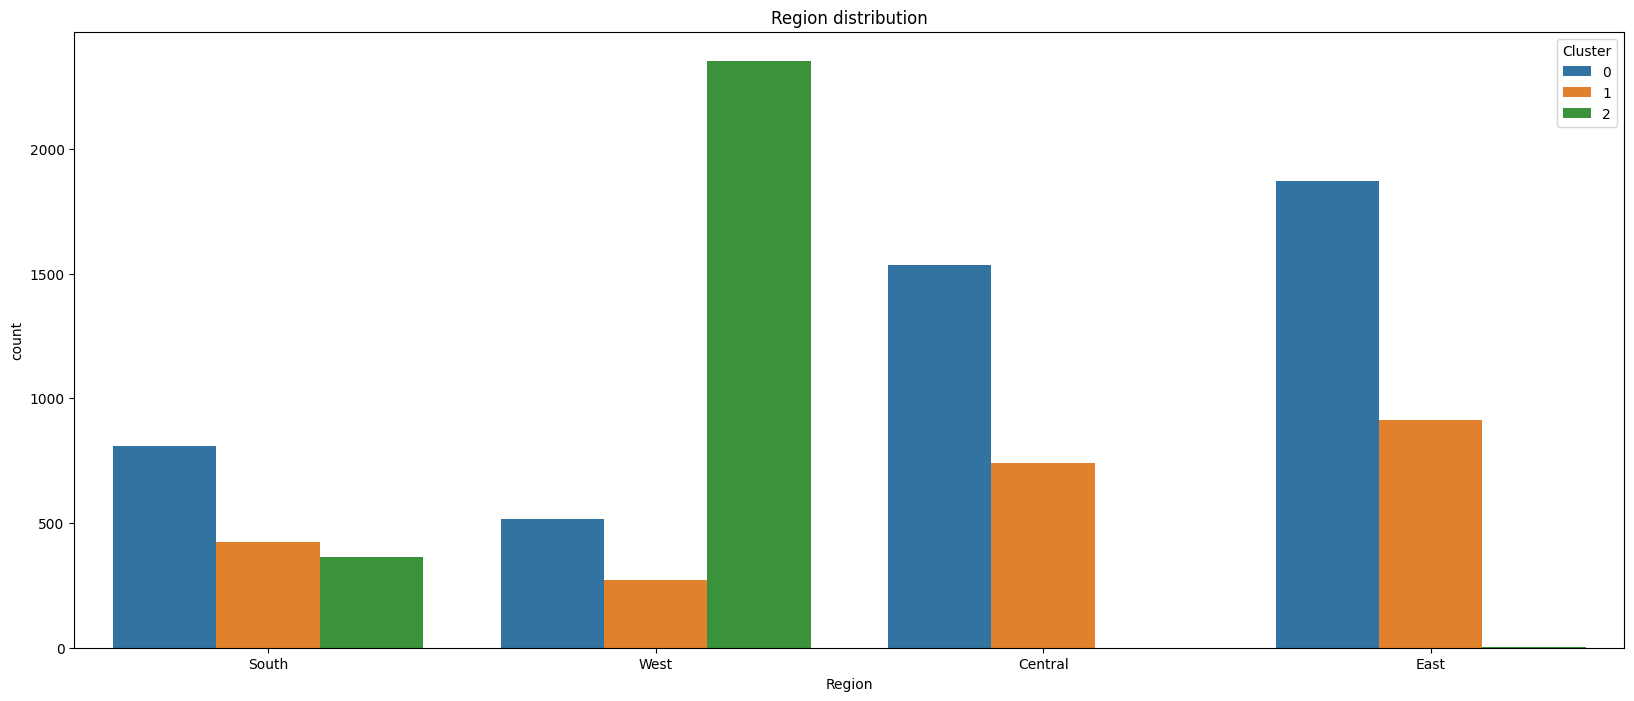

In [33]:
plt.figure(figsize=(20,8))
pl = sns.countplot(x=raw_df['Region'], hue=raw_df['Cluster'])
pl.set_title('Region distribution')
plt.show()


In [ ]:
import openpyxl

raw_df.to_excel('./2.xlsx')

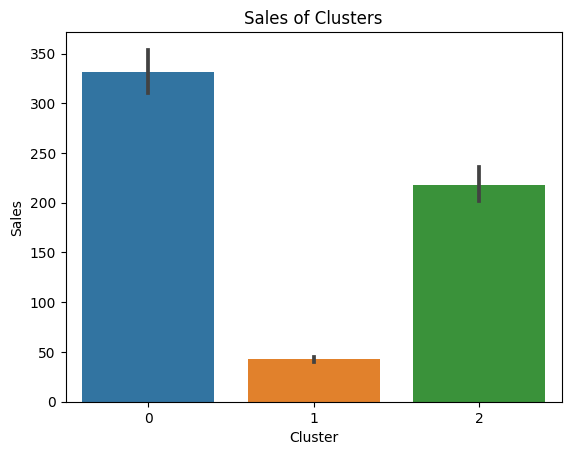

In [ ]:
cluster_sums = raw_df.groupby(raw_df['Cluster'])[['Sales']].sum().reset_index()
pl = sns.barplot(x=raw_df['Cluster'], y=raw_df['Sales'], data=cluster_sums)
pl.set_title('Sales of Clusters')
plt.show()

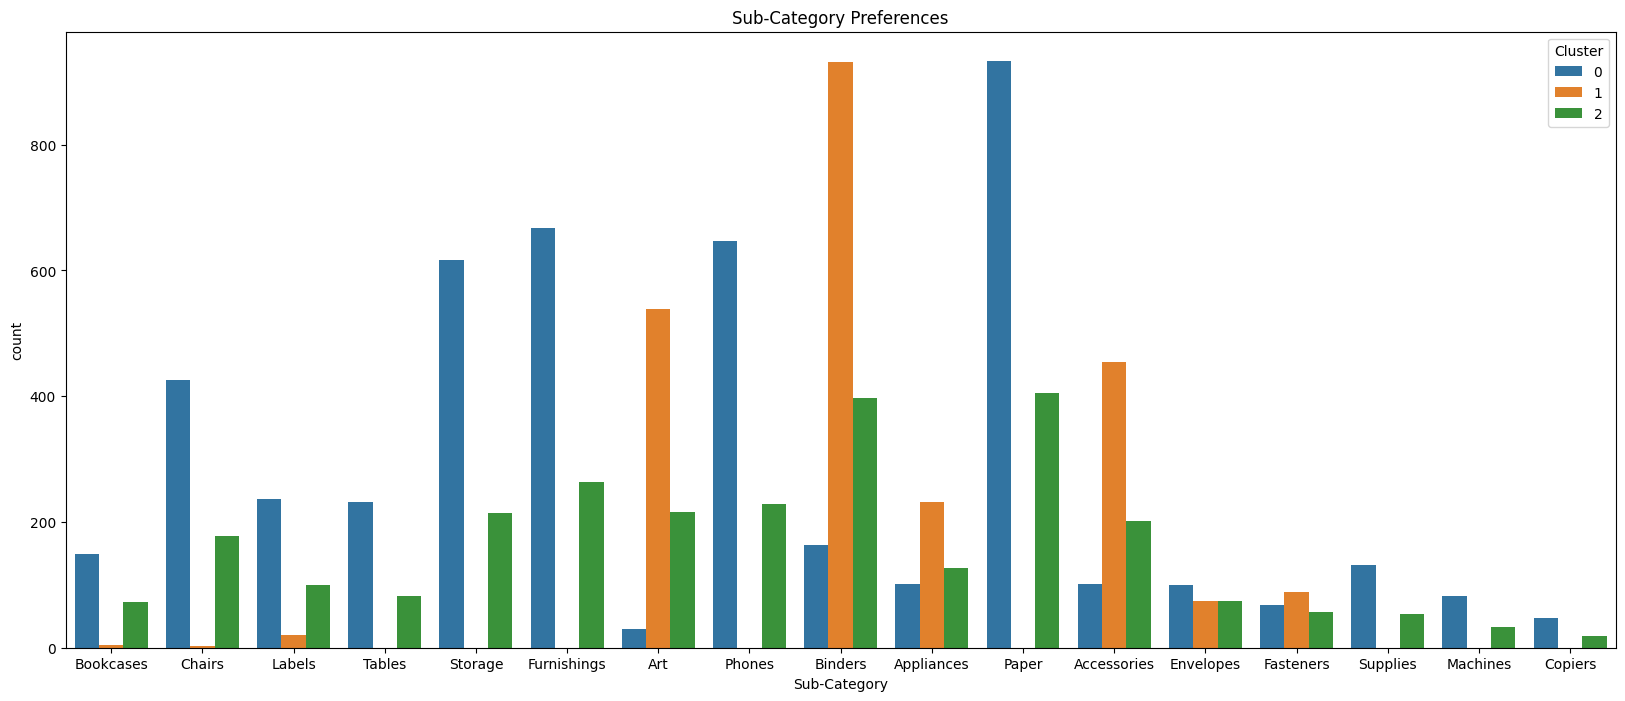

In [ ]:
plt.figure(figsize=(20,8))
pl = sns.countplot(x=raw_df['Sub-Category'], hue=raw_df['Cluster'])
pl.set_title('Sub-Category Preferences')
plt.show()


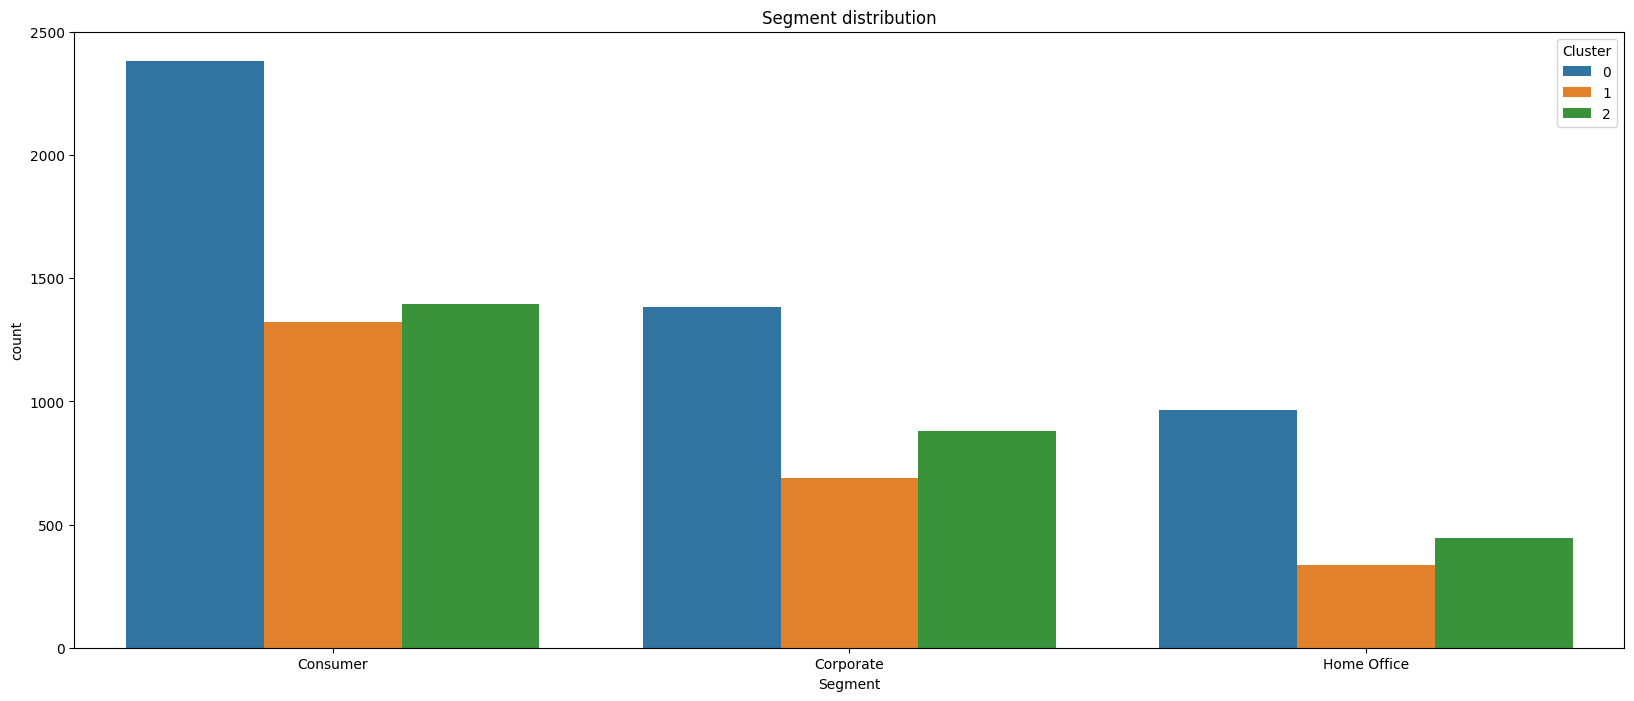

In [ ]:
plt.figure(figsize=(20,8))
pl = sns.countplot(x=raw_df['Segment'], hue=raw_df['Cluster'])
pl.set_title('Segment distribution')
plt.show()
